In [2]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from fly_analysis.trajectory import heading_direction_diff

In [3]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240928_140534.braidz")
df,csvs["opto"]

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240928_140534.braidz using pyarrow


(          obj_id    frame     timestamp         x         y         z  \
 0              5    37734  1.727525e+09 -0.028148  0.011867  0.186194   
 1              5    37735  1.727525e+09 -0.026207  0.013204  0.186496   
 2              5    37736  1.727525e+09 -0.024338  0.014683  0.186581   
 3              5    37737  1.727525e+09 -0.022363  0.015184  0.185685   
 4              5    37738  1.727525e+09 -0.020417  0.015190  0.184397   
 ...          ...      ...           ...       ...       ...       ...   
 11264767   78805  8634601  1.727611e+09 -0.049587 -0.226018  0.004426   
 11264768   78805  8634602  1.727611e+09 -0.049633 -0.226056  0.004389   
 11264769   78805  8634603  1.727611e+09 -0.049732 -0.226137  0.004404   
 11264770   78805  8634604  1.727611e+09 -0.049915 -0.226243  0.004468   
 11264771   78807  8667448  1.727612e+09  0.037287  0.027874  0.102215   
 
               xvel      yvel      zvel           P00           P01  \
 0         0.037709  0.082525  0.199765

In [4]:
data = extract_stimulus_centered_data(df, csvs["opto"])
list(data)

['angular_velocity', 'linear_velocity', 'position', 'timestamps']

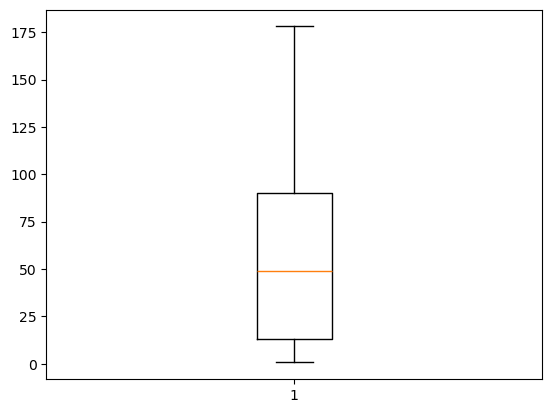

In [5]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()

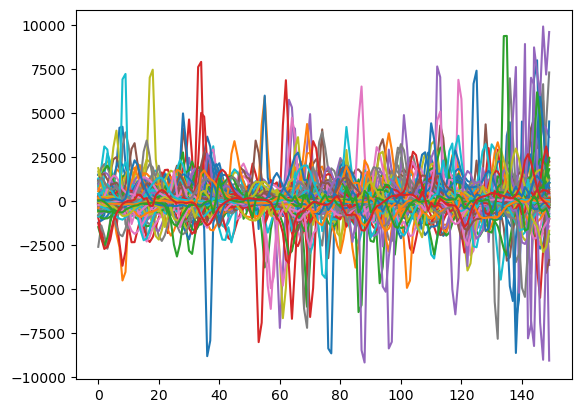

In [6]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

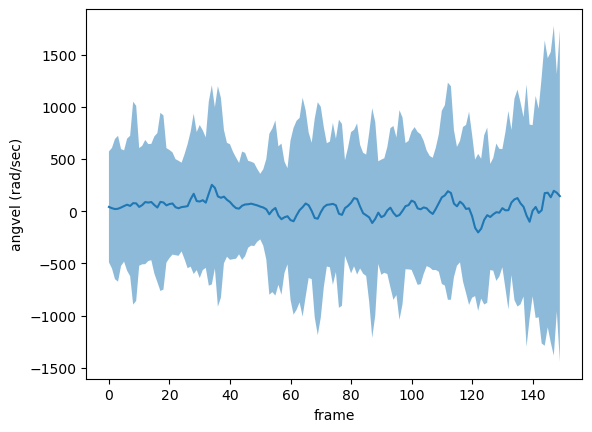

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

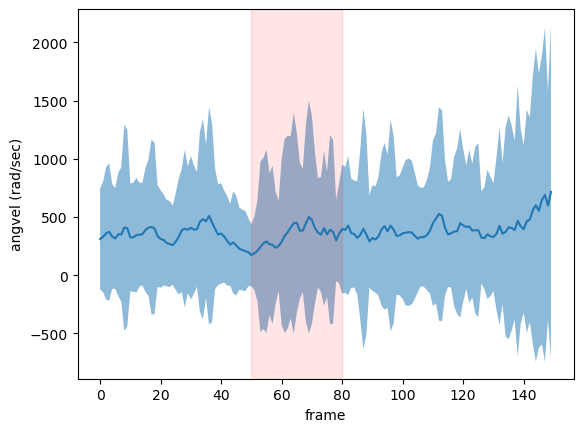

In [8]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.1)
plt.show()